NLP Tutorial - Text Representation: TF-IDF

![](https://i.imgur.com/ReRZthV.png)

- Generic terms suppress the influence of relavant terms

Model might think these two are articles are related

![](https://i.imgur.com/379VN7l.png)
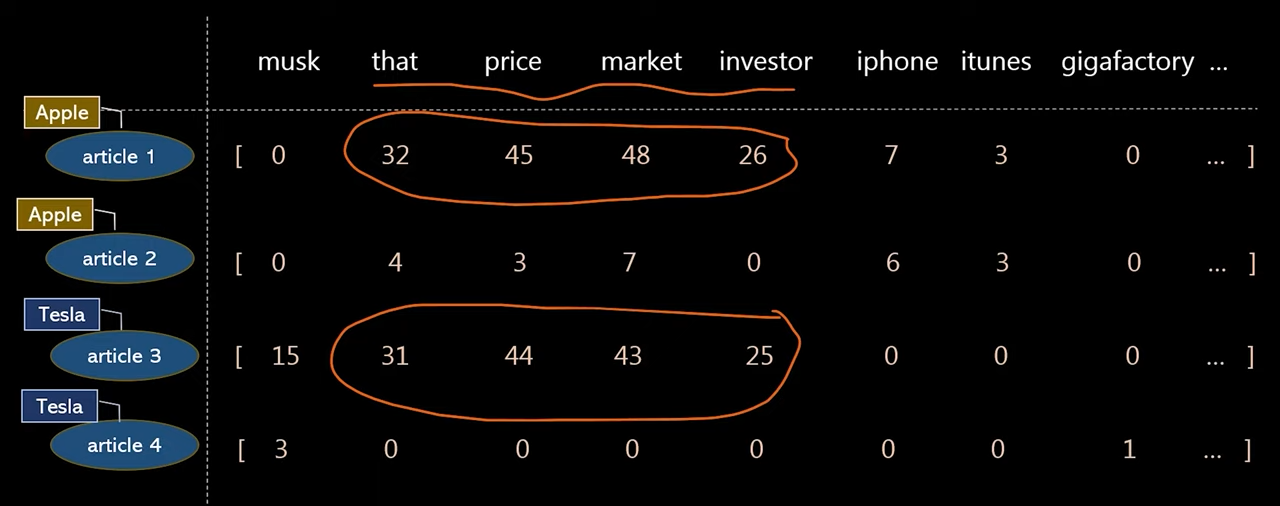


- Solution: If the frequency across documents is higher, lower the influence

![](https://i.imgur.com/JmEWAAe.png)
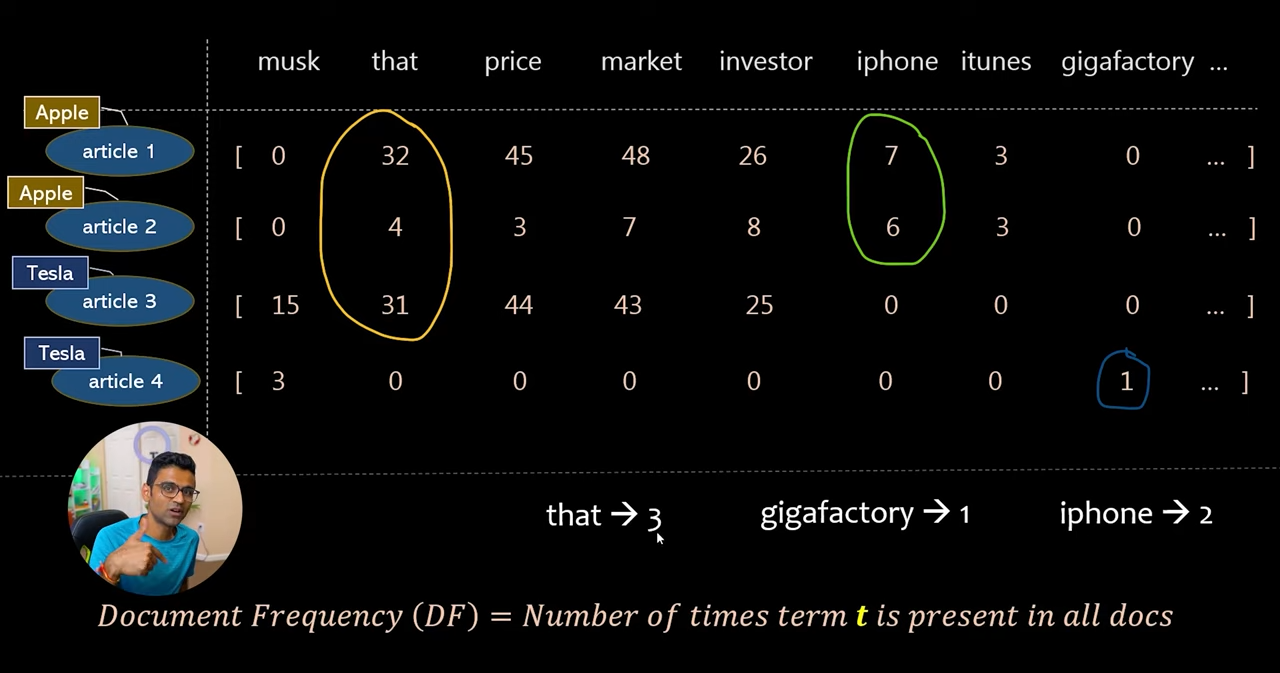

![](https://i.imgur.com/9QxyWrM.png)

### sklearn

If `smooth_idf=True` (the default), the constant "1" is added to the numerator and denominator of the IDF as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions. The IDF formula is:

$$
\text{idf}(t) = \log \left( \frac{1 + n}{1 + \text{df}(t)} \right) + 1
$$

![VS--YouTube-TextRepresentationUsingTF-IDFNLPTutorialForBeginners-S2E6-12’12”.png](https://i.ibb.co/DgnxQ86/VS-You-Tube-Text-Representation-Using-TF-IDFNLPTutorial-For-Beginners-S2-E6-12-12.png)
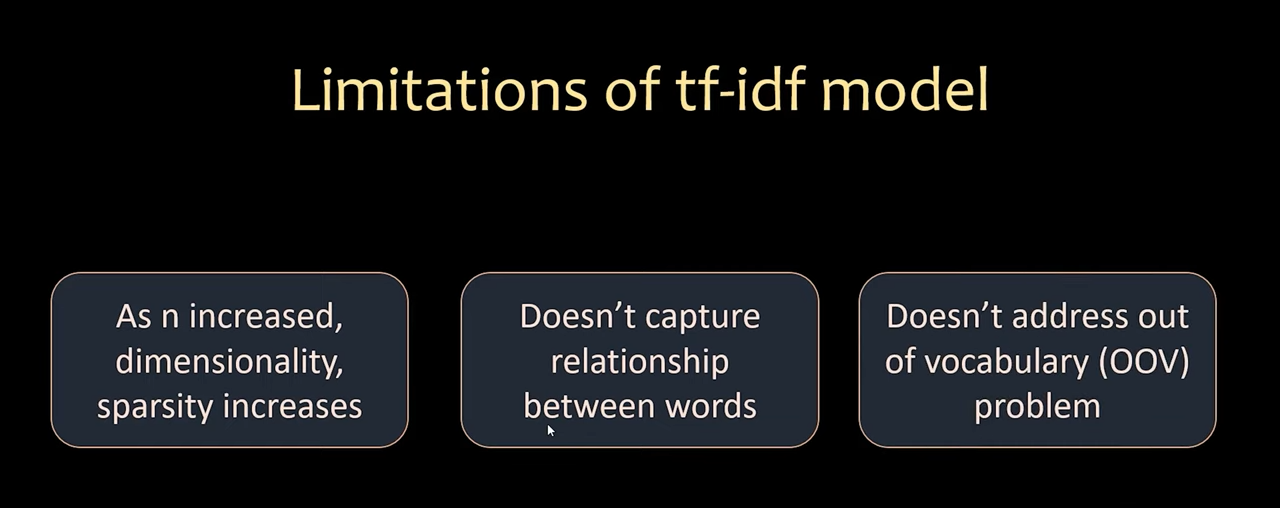

### Why use log?

If the term frequency for the word `'computer'` in `doc1` is 10 and in `doc2` it's 20, we can say that `doc2` is more relevant than `doc1` for the word `'computer'`.

However, if the term frequency of the same word, `'computer'`, for `doc1` is 1 million and `doc2` is 2 million, at this point, there is not much difference in terms of relevancy anymore because they both contain a very high count for the term `'computer'`.

Adding `log` is to dampen the importance of a term that has a high frequency. For example, using $\log_2$, the count of 1 million will be reduced to $19.9$

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing"
]

In [12]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amazon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [13]:
print(dir(v))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_char_ngrams', '_char_wb_ngrams', '_check_feature_names', '_check_n_features', '_check_params', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_param_names', '_get_tags', '_limit_features', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sort_features', '_stop_words_id', '_tfidf', '_validate_data', '_validate_ngram_range', '_validate_params', '_validate_vocabulary', '_warn_for_unused_params', '_white_spaces', '_word_ngrams', 'analyzer', 'binary', 'build_analyzer', 'build_preprocessor', 'build_tokenizer', 'decode', 'deco

In [14]:
features = v.get_feature_names_out()

[(features[i], v.idf_[i]) for i in range(len(features))]

[('already', 2.504077396776274),
 ('am', 2.504077396776274),
 ('amazing', 2.504077396776274),
 ('amazon', 2.504077396776274),
 ('and', 2.504077396776274),
 ('announcing', 1.4054651081081644),
 ('apple', 2.504077396776274),
 ('are', 2.504077396776274),
 ('ate', 2.504077396776274),
 ('biryani', 2.504077396776274),
 ('dot', 2.504077396776274),
 ('eating', 2.09861228866811),
 ('eco', 2.504077396776274),
 ('google', 2.504077396776274),
 ('grapes', 2.504077396776274),
 ('iphone', 2.504077396776274),
 ('ironman', 2.504077396776274),
 ('is', 1.1177830356563834),
 ('loki', 2.504077396776274),
 ('microsoft', 2.504077396776274),
 ('model', 2.504077396776274),
 ('new', 1.4054651081081644),
 ('pixel', 2.504077396776274),
 ('pizza', 2.504077396776274),
 ('something', 2.504077396776274),
 ('surface', 2.504077396776274),
 ('tesla', 2.504077396776274),
 ('thor', 2.504077396776274),
 ('tomorrow', 1.4054651081081644),
 ('you', 2.504077396776274)]

In [15]:
corpus[0]

'Thor eating pizza, Loki is eating pizza, Ironman ate pizza already'

In [17]:
transformed_output[0].toarray()

array([[0.24247317, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24247317, 0.        ,
        0.        , 0.40642288, 0.        , 0.        , 0.        ,
        0.        , 0.24247317, 0.10823643, 0.24247317, 0.        ,
        0.        , 0.        , 0.        , 0.7274195 , 0.        ,
        0.        , 0.        , 0.24247317, 0.        , 0.        ]])

Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.

Text: Description of an item sold on e-commerce website

Label: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [1]:
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 64%|████████████████████████▏             | 5.00M/7.86M [00:00<00:00, 45.2MB/s]
100%|██████████████████████████████████████| 7.86M/7.86M [00:00<00:00, 64.2MB/s]


In [6]:
import pandas as pd
df = pd.read_csv('/kaggle/working/ecommerce-text-classification.zip', header=None, names=['Label', 'Text'])

In [7]:
df.head()

,Label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [9]:
df['Label'].value_counts()

Label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [10]:
df = df.groupby('Label').sample(n=6000, random_state=42).reset_index(drop=True)

In [16]:
label_map = {label:i for i, label in enumerate(df['Label'].unique())}

df['label_num'] = df['Label'].map(label_map)

In [17]:
df

,Label,Text,label_num
0,Books,L'Eschole Francoise: Pour Apprendre A Bien Par...,0
1,Books,Organic Shastra Pav Bhaji Masala 150g Pav bhaj...,0
2,Books,The Great War for Civilisation: The Conquest o...,0
3,Books,"MHT-CET 20 Question Paper Set (Physics, Chemis...",0
4,Books,"GROUP-1 MAINS APPSC-(Science & Technology,Envi...",0
...,...,...,...
23995,Household,VARSHINE Happy Home || Laurels Wall Fan || Mul...,3
23996,Household,"Tosaa Mix Fruit Plastic Tray, 34cm, White",3
23997,Household,Bison International Stainless Steel Press Coff...,3
23998,Household,GETKO WITH DEVICE 7 Function High Pressure Car...,3


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['Text'],
    df['label_num'],
    test_size = 0.2,
    random_state = 1,
    stratify = df['label_num']
)